<a href="https://colab.research.google.com/github/badaramoni/linear-regression-lib/blob/main/linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X),len(y)

(50, 50)

In [6]:
#create train split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data = X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels, c= "b",s=4,label ="Training data")

  plt.scatter(test_data,test_labels, c ='g', s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});



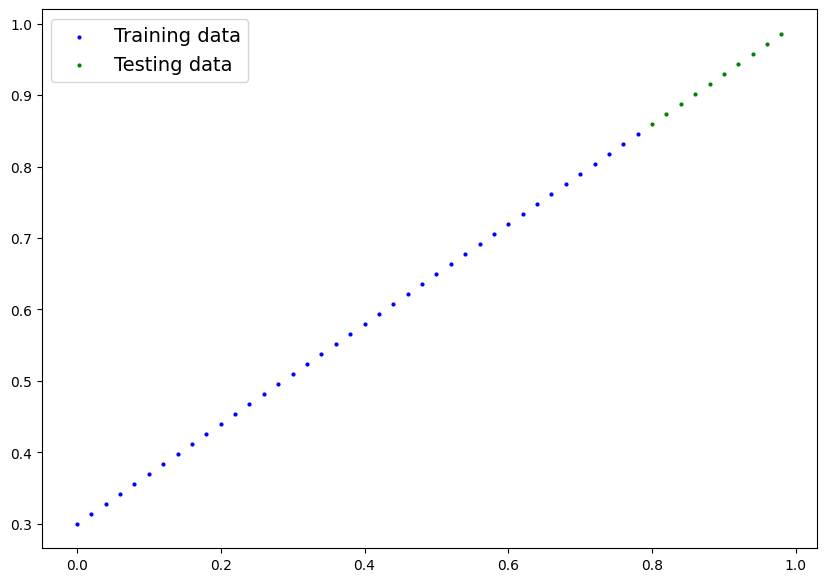

In [8]:
plot_predictions()

In [9]:
#building first pytorch model

#create linear regression model


class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [10]:
#pytorch
#torch.nn
#torch.nn.Parameters
#torch.nn.Module
#torch.optim
#def forward()



In [11]:
#create a random seed

torch.manual_seed(42)


#create an instance of the model
model_0 = LinearRegressionModel()


list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [13]:
weight,bias

(0.7, 0.3)

In [14]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
#prediction using torch.inference_mode()

with torch.inference_mode():
  y_preds = model_0(X_test)

#with torch.no_grad():
  #y_preds = model_0(X_test)

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

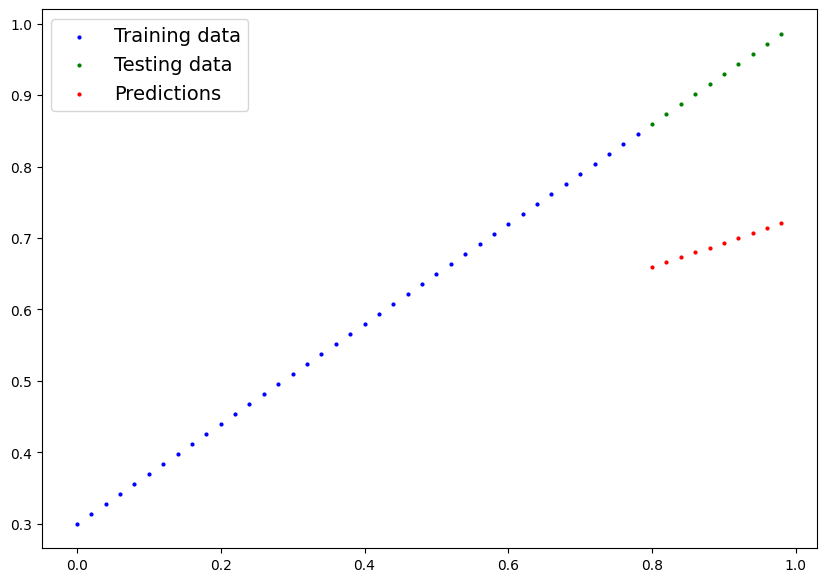

In [16]:
plot_predictions(predictions=y_preds)

In [17]:
##Training model

##

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [84]:
#setup loss function
lossfn = nn.L1Loss()
#setup optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(),lr = 0.001)

In [85]:
with torch.no_grad():
  list(model_0.parameters())

In [86]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6893], requires_grad=True),
 Parameter containing:
 tensor([0.2989], requires_grad=True)]

In [87]:
### Training Loop
torch.manual_seed(42)

epochs = 100


for epochs in range(epochs):
  model_0.train()

  y_pred = model_0(X_train)

  loss = lossfn(y_pred,y_train)
  print(f"Loss:{loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  print(model_0.state_dict())

Loss:0.00520740682259202
OrderedDict([('weights', tensor([0.6897])), ('bias', tensor([0.2999]))])
Loss:0.00405532494187355
OrderedDict([('weights', tensor([0.6901])), ('bias', tensor([0.3009]))])
Loss:0.003041864838451147
OrderedDict([('weights', tensor([0.6905])), ('bias', tensor([0.3017]))])
Loss:0.002427927451208234
OrderedDict([('weights', tensor([0.6909])), ('bias', tensor([0.3022]))])
Loss:0.0020659477449953556
OrderedDict([('weights', tensor([0.6912])), ('bias', tensor([0.3026]))])
Loss:0.001867581158876419
OrderedDict([('weights', tensor([0.6915])), ('bias', tensor([0.3028]))])
Loss:0.001743828528560698
OrderedDict([('weights', tensor([0.6917])), ('bias', tensor([0.3030]))])
Loss:0.0016664810245856643
OrderedDict([('weights', tensor([0.6919])), ('bias', tensor([0.3030]))])
Loss:0.001616019057109952
OrderedDict([('weights', tensor([0.6921])), ('bias', tensor([0.3031]))])
Loss:0.0015712759923189878
OrderedDict([('weights', tensor([0.6923])), ('bias', tensor([0.3031]))])
Loss:0.00

In [88]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

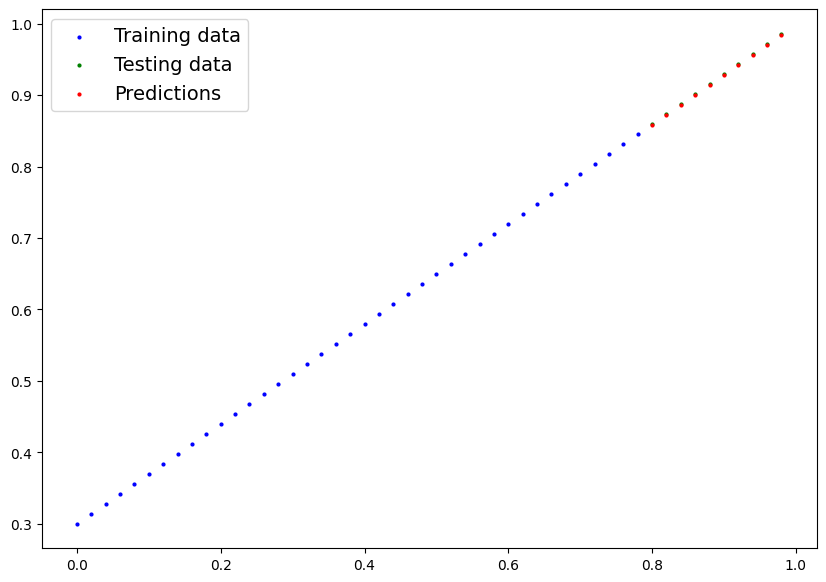

In [89]:
plot_predictions(predictions=y_pred_new)

In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6991])), ('bias', tensor([0.2996]))])

In [26]:
weight, bias

(0.7, 0.3)